In [17]:
import pandas as pd
import seaborn as sns

In [18]:
from pathlib import Path
dir_ = Path('data')
list(dir_.iterdir())

[PosixPath('data/train_salaries.csv'),
 PosixPath('data/test_features.csv'),
 PosixPath('data/train_features.csv')]

In [19]:
df_train_features = pd.read_csv('data/train_features.csv')
df_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [20]:
df_train_salaries = pd.read_csv('data/train_salaries.csv')
df_train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [21]:
df = df_train_features.merge(df_train_salaries, on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [22]:
df = df.sample(n=10000)
df.shape

(10000, 9)

In [23]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,10000.000000,10000.00000,10000.0000
mean,11.984400,49.57380,115.7156
std,7.178294,28.80881,38.3626
min,0.000000,0.00000,24.0000
25%,6.000000,25.00000,88.0000
50%,12.000000,49.00000,113.0000
75%,18.000000,75.00000,140.0000
max,24.000000,99.00000,267.0000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 793875 to 724035
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jobId                10000 non-null  object
 1   companyId            10000 non-null  object
 2   jobType              10000 non-null  object
 3   degree               10000 non-null  object
 4   major                10000 non-null  object
 5   industry             10000 non-null  object
 6   yearsExperience      10000 non-null  int64 
 7   milesFromMetropolis  10000 non-null  int64 
 8   salary               10000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 781.2+ KB


In [25]:
df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
import matplotlib.pyplot as plt


In [28]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

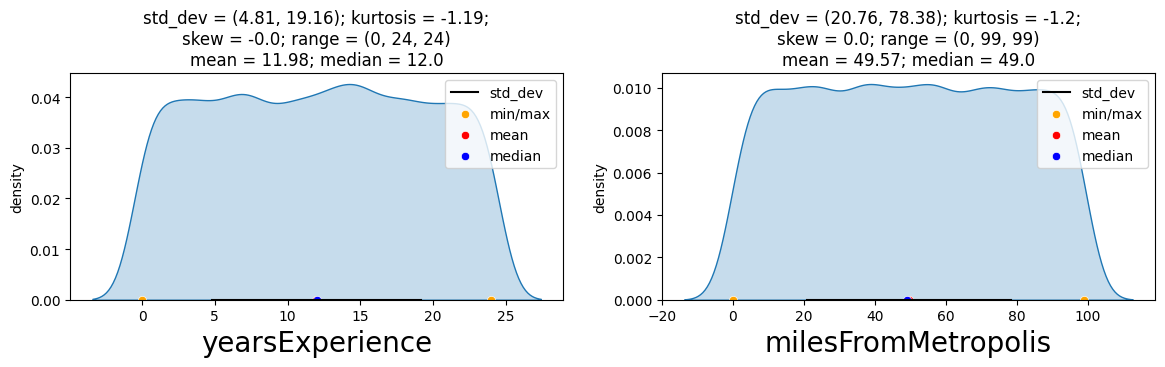

In [29]:
UVA_numeric(df, ['yearsExperience', 'milesFromMetropolis'])

#### Summary of yearExperience:
- No Skewness and outlier found.
- Kurtosis is negative but negociable.

#### Summary of milesFromMetropolis:
- No Skewness and outlier found.
- Kurtosis is negative but negociable.

In [30]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

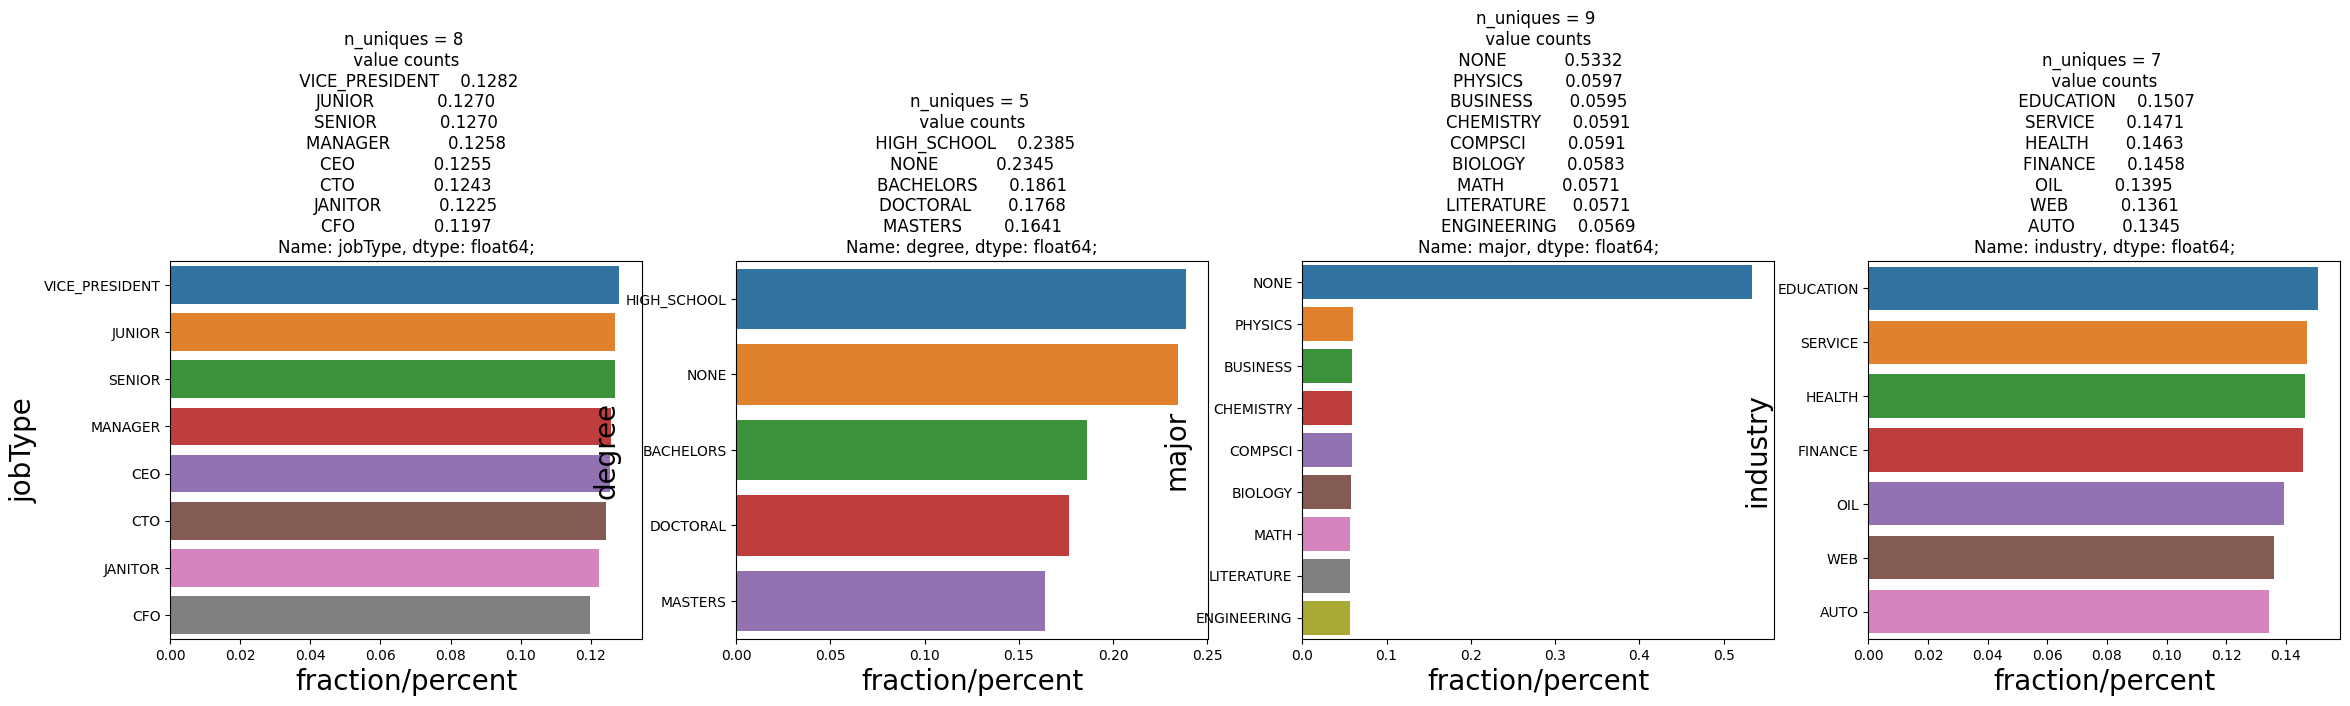

In [31]:
UVA_category(df, ['jobType', 'degree', 'major', 'industry'])

#### Summary of jobType:
- Values are equally distributed.

#### Summary of degree:
- Majority of employees are from High School.
- Some employees haven't mentioned any degree.

#### Summary of major:
- Most of the employee haven't mentioned their major studies.

#### Summary of industry:
- Values are equally distributed.

### None should be replaced with empty string.

In [32]:
# df.loc[df['degree'] == "NONE", ['degree']] = ''
# df.loc[df['major'] == "NONE", ['major']] = ''

In [33]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

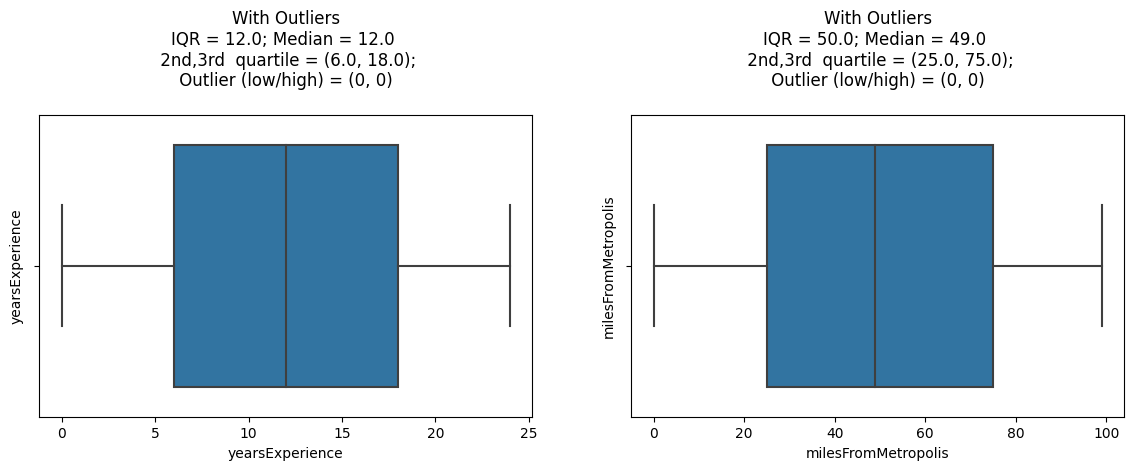

In [34]:
UVA_outlier(df, ['yearsExperience', 'milesFromMetropolis'], include_outlier=True)

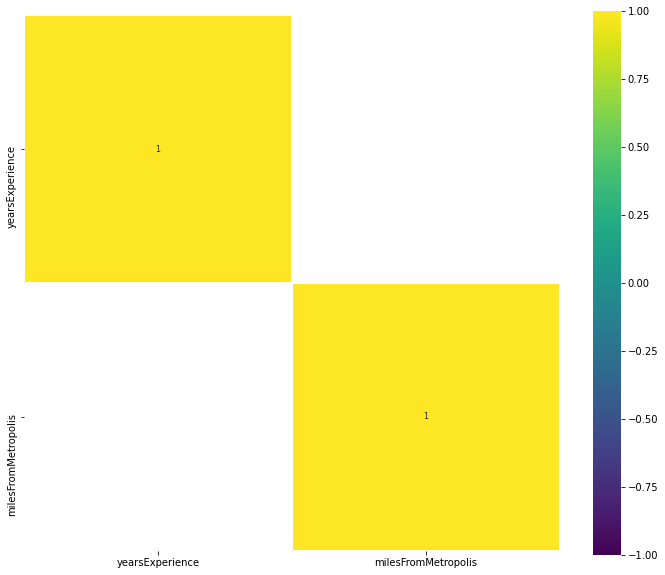

In [35]:
corr = df.drop('salary', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [36]:
# Feature Selection

In [37]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X = df.drop('salary', axis=1)
y = df['salary']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

ValueError: could not convert string to float: 'JOB1362685067700'

In [38]:
df[['jobType', 'degree', 'jobType', 'degree', 'major', 'industry']]

,jobType,degree,jobType,degree,major,industry
793875,MANAGER,DOCTORAL,MANAGER,DOCTORAL,NONE,EDUCATION
850681,VICE_PRESIDENT,DOCTORAL,VICE_PRESIDENT,DOCTORAL,MATH,AUTO
267653,JUNIOR,DOCTORAL,JUNIOR,DOCTORAL,COMPSCI,EDUCATION
12935,JANITOR,HIGH_SCHOOL,JANITOR,HIGH_SCHOOL,NONE,SERVICE
379252,MANAGER,DOCTORAL,MANAGER,DOCTORAL,BUSINESS,AUTO
...,...,...,...,...,...,...
900395,JUNIOR,MASTERS,JUNIOR,MASTERS,LITERATURE,OIL
211369,SENIOR,DOCTORAL,SENIOR,DOCTORAL,BIOLOGY,SERVICE
892606,MANAGER,HIGH_SCHOOL,MANAGER,HIGH_SCHOOL,NONE,OIL
277451,CTO,BACHELORS,CTO,BACHELORS,COMPSCI,AUTO


In [39]:
# df['jobType'].unique()
df.loc[df['jobType'] == "CEO", ['jobType']] = 8
df.loc[df['jobType'] == "CTO", ['jobType']] = 7
df.loc[df['jobType'] == "CFO", ['jobType']] = 6
df.loc[df['jobType'] == "VICE_PRESIDENT", ['jobType']] = 5
df.loc[df['jobType'] == "MANAGER", ['jobType']] = 4
df.loc[df['jobType'] == "SENIOR", ['jobType']] = 3
df.loc[df['jobType'] == "JUNIOR", ['jobType']] = 2
df.loc[df['jobType'] == "JANITOR", ['jobType']] = 1
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
793875,JOB1362685201562,COMP7,4,DOCTORAL,NONE,EDUCATION,0,56,67
850681,JOB1362685258368,COMP62,5,DOCTORAL,MATH,AUTO,4,41,139
267653,JOB1362684675340,COMP38,2,DOCTORAL,COMPSCI,EDUCATION,19,46,117
12935,JOB1362684420622,COMP52,1,HIGH_SCHOOL,NONE,SERVICE,18,81,53
379252,JOB1362684786939,COMP10,4,DOCTORAL,BUSINESS,AUTO,9,31,98


In [52]:
df['degree'].unique()
df.loc[df['degree'] == "DOCTORAL", ['degree']] = 5
df.loc[df['degree'] == "MASTERS", ['degree']] = 4
df.loc[df['degree'] == "BACHELORS", ['degree']] = 3
df.loc[df['degree'] == "HIGH_SCHOOL", ['degree']] = 2
df.loc[df['degree'] == "NONE", ['degree']] = 1
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
793875,JOB1362685201562,COMP7,4,5,NONE,EDUCATION,0,56,67
850681,JOB1362685258368,COMP62,5,5,MATH,AUTO,4,41,139
267653,JOB1362684675340,COMP38,2,5,COMPSCI,EDUCATION,19,46,117
12935,JOB1362684420622,COMP52,1,2,NONE,SERVICE,18,81,53
379252,JOB1362684786939,COMP10,4,5,BUSINESS,AUTO,9,31,98


In [53]:
df['industry'].unique()

array(['EDUCATION', 'AUTO', 'SERVICE', 'HEALTH', 'WEB', 'OIL', 'FINANCE'],
      dtype=object)

In [42]:
import pandas as pd

In [54]:
# major
major_dummies = pd.get_dummies(df['major'])
major_dummies.head(1)

,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
793875,0,0,0,0,0,0,0,1,0


In [55]:
# industry
industry_dummies = pd.get_dummies(df['industry'])
industry_dummies.head(1)

,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
793875,0,1,0,0,0,0,0


In [56]:
# Company ID
companyId_dummies = pd.get_dummies(df['companyId'])
companyId_dummies.head(1)

,COMP0,COMP1,COMP10,COMP11,COMP12,COMP13,COMP14,COMP15,COMP16,COMP17,...,COMP57,COMP58,COMP59,COMP6,COMP60,COMP61,COMP62,COMP7,COMP8,COMP9
793875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
793875,JOB1362685201562,COMP7,4,5,NONE,EDUCATION,0,56,67
850681,JOB1362685258368,COMP62,5,5,MATH,AUTO,4,41,139
267653,JOB1362684675340,COMP38,2,5,COMPSCI,EDUCATION,19,46,117
12935,JOB1362684420622,COMP52,1,2,NONE,SERVICE,18,81,53
379252,JOB1362684786939,COMP10,4,5,BUSINESS,AUTO,9,31,98


In [58]:
df_final = pd.concat([df[['jobType', 'degree', 'yearsExperience', 'milesFromMetropolis', 'salary']], companyId_dummies, industry_dummies, major_dummies, industry_dummies], axis=1)
df_final.shape

(10000, 91)

In [59]:
df_final.head(2)

,jobType,degree,yearsExperience,milesFromMetropolis,salary,COMP0,COMP1,COMP10,COMP11,COMP12,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
793875,4,5,0,56,67,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
850681,5,5,4,41,139,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [60]:
X = df_final.drop('salary', axis=1)
y = df_final['salary']

Feature 0: 3295.007971 jobType
Feature 1: 1122.730835 degree
Feature 2: 1057.654073 yearsExperience
Feature 3: 559.101805 milesFromMetropolis
Feature 4: 0.860878 COMP0
Feature 5: 0.526320 COMP1
Feature 6: 0.053176 COMP10
Feature 7: 0.375307 COMP11
Feature 8: 0.149396 COMP12
Feature 9: 2.836774 COMP13
Feature 10: 0.295819 COMP14
Feature 11: 0.693564 COMP15
Feature 12: 0.003040 COMP16
Feature 13: 0.213555 COMP17
Feature 14: 1.297621 COMP18
Feature 15: 0.112605 COMP19
Feature 16: 0.009728 COMP2
Feature 17: 0.321386 COMP20
Feature 18: 0.592042 COMP21
Feature 19: 0.086776 COMP22
Feature 20: 0.079235 COMP23
Feature 21: 1.043573 COMP24
Feature 22: 1.266018 COMP25
Feature 23: 0.088313 COMP26
Feature 24: 3.730282 COMP27
Feature 25: 0.130176 COMP28
Feature 26: 0.067039 COMP29
Feature 27: 1.140665 COMP3
Feature 28: 0.903287 COMP30
Feature 29: 0.481381 COMP31
Feature 30: 0.003059 COMP32
Feature 31: 0.172744 COMP33
Feature 32: 0.164108 COMP34
Feature 33: 0.056054 COMP35
Feature 34: 0.056127 COMP36


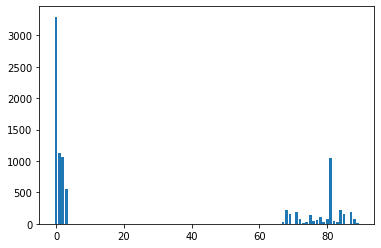

In [61]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X = df_final.drop('salary', axis=1)
y = df_final['salary']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f %s' % (i, fs.scores_[i], X.columns[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [62]:
X.columns[0]

'jobType'

In [63]:
# Models

In [65]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define dataset
X = df_final.drop('salary', axis=1)
y = df_final['salary']

# # define the evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()

fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1)
# perform the search
results = search.fit(X, y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# # summarize all
# means = results.cv_results_['mean_test_score']
# params = results.cv_results_['params']
# for mean, param in zip(means, params):
#     print(">%.3f with: %r" % (mean, param))

Best MAE: -401.043
Best Config: {'sel__k': 70}


In [174]:
df_final

,jobType,degree,yearsExperience,milesFromMetropolis,salary,COMP0,COMP1,COMP10,COMP11,COMP12,...,LITERATURE,MATH,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,6,4,10,83,130,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,8,2,3,73,101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,5,10,38,137,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,4,5,8,17,142,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,8,16,163,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [126]:
df_final.columns

Index(['jobType', 'degree', 'yearsExperience', 'milesFromMetropolis', 'salary',
       'COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
       'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP2', 'COMP20',
       'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25', 'COMP26', 'COMP27',
       'COMP28', 'COMP29', 'COMP3', 'COMP30', 'COMP31', 'COMP32', 'COMP33',
       'COMP34', 'COMP35', 'COMP36', 'COMP37', 'COMP38', 'COMP39', 'COMP4',
       'COMP40', 'COMP41', 'COMP42', 'COMP43', 'COMP44', 'COMP45', 'COMP46',
       'COMP47', 'COMP48', 'COMP49', 'COMP5', 'COMP50', 'COMP51', 'COMP52',
       'COMP53', 'COMP54', 'COMP55', 'COMP56', 'COMP57', 'COMP58', 'COMP59',
       'COMP6', 'COMP60', 'COMP61', 'COMP62', 'COMP7', 'COMP8', 'COMP9',
       'AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB', '',
       'BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING',
       'LITERATURE', 'MATH', 'PHYSICS', 'AUTO', 'EDUCATION', 'FINANCE',
       'HEALTH', '

In [129]:
df['salary']

0         130
1         101
2         137
3         142
4         163
         ... 
999995     88
999996    160
999997     64
999998    149
999999     88
Name: salary, Length: 1000000, dtype: int64

In [74]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR

df_final1 = df_final[((df_final['salary'] >= 88) & (df_final['salary'] <= 140))]

X_features = df_final1.drop('salary', axis=1).columns.tolist()

for col in X_features:
    # define dataset
    X = df_final1[[col]]
    y = df_final1['salary']

    # define the pipeline to evaluate
    model = LinearSVR()
    model.fit(X, y)

    # summarize best
    mae_sum = 0
    for y_salary, x in zip(y, X.values):
        y_pred_salary = model.predict([x])[0]
        mae_sum += abs(y_salary - y_pred_salary)
    mae = round(mae_sum / len(y), 2)
    r2 = round(model.score(X, y), 2)
    print('Feature: ', col, ', MAE: ', mae, r2)


Feature:  jobType , MAE:  12.28 0.04
Feature:  degree , MAE:  12.67 0.01


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Feature:  yearsExperience , MAE:  12.73 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Feature:  milesFromMetropolis , MAE:  12.92 -0.03
Feature:  COMP0 , MAE:  12.91 -0.01
Feature:  COMP1 , MAE:  12.91 -0.01
Feature:  COMP10 , MAE:  12.91 -0.01
Feature:  COMP11 , MAE:  12.91 -0.01
Feature:  COMP12 , MAE:  12.91 -0.01
Feature:  COMP13 , MAE:  12.91 -0.01
Feature:  COMP14 , MAE:  12.91 -0.01
Feature:  COMP15 , MAE:  12.91 -0.01
Feature:  COMP16 , MAE:  12.91 -0.01
Feature:  COMP17 , MAE:  12.91 -0.01
Feature:  COMP18 , MAE:  12.9 -0.01
Feature:  COMP19 , MAE:  12.91 -0.01
Feature:  COMP2 , MAE:  12.91 -0.01
Feature:  COMP20 , MAE:  12.91 -0.01
Feature:  COMP21 , MAE:  12.91 -0.01
Feature:  COMP22 , MAE:  12.91 -0.01
Feature:  COMP23 , MAE:  12.91 -0.01
Feature:  COMP24 , MAE:  12.91 -0.01
Feature:  COMP25 , MAE:  12.91 -0.01
Feature:  COMP26 , MAE:  12.91 -0.01
Feature:  COMP27 , MAE:  12.91 -0.01
Feature:  COMP28 , MAE:  12.91 -0.01
Feature:  COMP29 , MAE:  12.91 -0.01
Feature:  COMP3 , MAE:  12.91 -0.01
Feature:  COMP30 , MAE:  12.91 -0.01
Feature:  COMP31 , MAE:  12.91

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

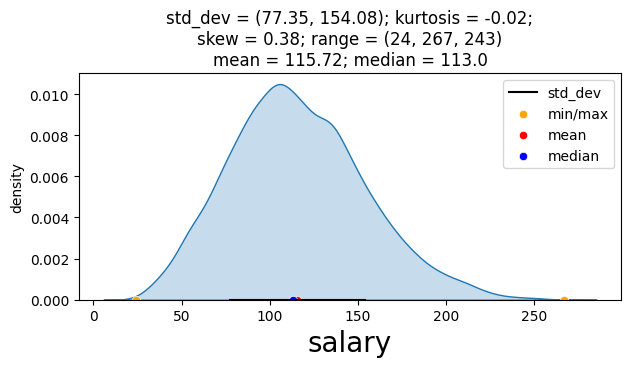

In [66]:
UVA_numeric(df_final, ['salary'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


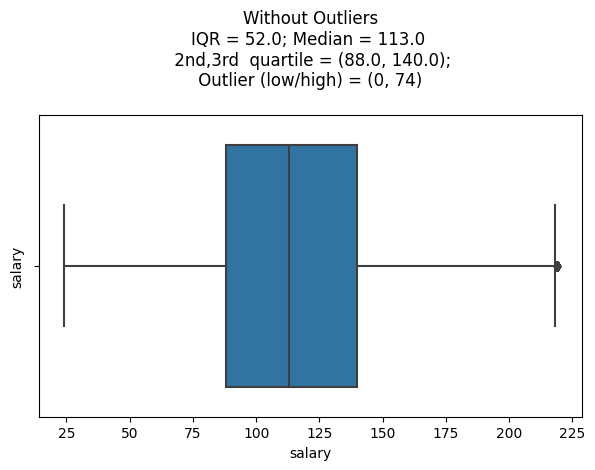

In [68]:
UVA_outlier(df_final, ['salary'], include_outlier=False)